<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°03

## Objetivos del laboratorio

* Reforzar conceptos básicos de análisis no supervisado.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://freedesignfile.com/upload/2013/06/Car-logos-1.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [243]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [244]:
# cargar datos
df = pd.read_csv(os.path.join("data","vehiculos_procesado_con_grupos.csv"), sep=",")\
       .drop(
            ["fabricante", 
             "modelo",
             "transmision", 
             "traccion", 
             "clase", 
             "combustible",
             "consumo"], 
    
          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


In [245]:
df.count() #contar datos no nulos inicialmente

year                    36791
desplazamiento          36789
cilindros               36788
co2                     36791
clase_tipo              36791
traccion_tipo           36791
transmision_tipo        36791
combustible_tipo        36791
tamano_motor_tipo       36789
consumo_tipo            36791
co2_tipo                36791
consumo_litros_milla    36791
dtype: int64

En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

## 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.




In [246]:
datos=df[['year','desplazamiento','cilindros','co2','consumo_litros_milla']]
encabezados=['year','desplazamiento','cilindros','co2','consumo_litros_milla']

#for col in encabezados:
col=encabezados

datos[col] = datos[col].fillna(datos[col].mean())   #REMPLAZAR POR EL PROMEDIO
datos


c:\programdata\miniconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588
...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150
36787,2016,0.9,3.0,246.000000,0.108155
36788,2016,0.9,3.0,255.000000,0.111336
36789,2017,0.9,3.0,248.000000,0.108155


In [247]:
scaler = MinMaxScaler()
datos[col] = scaler.fit_transform(datos[col]) #escalar variables
datos.describe()

<ipython-input-247-dadc9721909f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[col] = scaler.fit_transform(datos[col]) #escalar variables
c:\programdata\miniconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,year,desplazamiento,cilindros,co2,consumo_litros_milla
count,36791.000000,36791.000000,36791.000000,36791.000000,36791.000000
mean,0.493748,0.348947,0.267607,0.358049,0.285734
std,0.305137,0.174347,0.125567,0.095790,0.106183
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.205128,0.142857,0.288086,0.208866
50%,0.529412,0.307692,0.285714,0.352257,0.281734
75%,0.764706,0.474359,0.285714,0.424351,0.331027
max,1.000000,1.000000,1.000000,1.000000,1.000000


2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables numéricas a categóricas ocupando el comando **get_dummies** de pandas ([refrenecia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.



In [248]:
d3 = pd.get_dummies( df , prefix = ['clase_tipo', 'traccion_tipo','transmision_tipo','combustible_tipo','tamano_motor_tipo','consumo_tipo','co2_tipo'] )
d3

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,2.5,4.0,522.764706,0.222671,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,4.2,6.0,683.615385,0.291185,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,2.5,4.0,555.437500,0.236588,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,4.2,6.0,683.615385,0.291185,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,3.8,6.0,555.437500,0.236588,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,2015,1.0,3.0,244.000000,0.105150,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,2016,0.9,3.0,246.000000,0.108155,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,2016,0.9,3.0,255.000000,0.111336,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,2017,0.9,3.0,248.000000,0.108155,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


3.- Junte ambos dataset en uno, llamado **df_procesado**. 

In [249]:
d3[col]=datos[col]
d3

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0.000000,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0.000000,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.029412,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0.029412,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.088235,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36786,0.911765,0.051282,0.071429,0.173307,0.083878,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36787,0.941176,0.038462,0.071429,0.174919,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36788,0.941176,0.038462,0.071429,0.182174,0.096886,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
36789,0.970588,0.038462,0.071429,0.176532,0.090196,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de 8 clusters.
2. Calcular los cluster y el valor de los centroides.
3. Realizar que resumas las principales cualidades de cada cluster. Para  cada cluster calcule:

    a. Valor promedio de las variables numérica.\
    b. Moda para las variables numericas
    
    

In [250]:
d4=d3  #d4 contiene los clusters de 8 
# ajustar modelo: k-means

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8)
kmeans.fit(d4)


centroids = kmeans.cluster_centers_ # centros 
clusters = kmeans.labels_ # clusters

In [251]:
columnas_d4=['year', 'desplazamiento', 'cilindros', 'co2', 'consumo_litros_milla',
       'clase_tipo_Camionetas', 'clase_tipo_Coche Familiar',
       'clase_tipo_Coches Grandes', 'clase_tipo_Coches Medianos',
       'clase_tipo_Coches pequeños', 'clase_tipo_Deportivos',
       'clase_tipo_Furgoneta', 'clase_tipo_Vehículos Especiales',
       'traccion_tipo_cuatro', 'traccion_tipo_dos',
       'transmision_tipo_Automatica', 'transmision_tipo_Manual',
       'combustible_tipo_Hibrido', 'combustible_tipo_Normal',
       'combustible_tipo_Otros tipos de combustible',
       'combustible_tipo_Premium', 'tamano_motor_tipo_grande',
       'tamano_motor_tipo_mediano', 'tamano_motor_tipo_muy grande',
       'tamano_motor_tipo_muy pequeño', 'tamano_motor_tipo_pequeño',
       'consumo_tipo_alto', 'consumo_tipo_bajo', 'consumo_tipo_moderado',
       'consumo_tipo_muy alto', 'consumo_tipo_muy bajo', 'co2_tipo_alto',
       'co2_tipo_bajo', 'co2_tipo_moderado', 'co2_tipo_muy alto',
       'co2_tipo_muy bajo']

In [252]:
# etiquetar los datos con los clusters encontrados
d4["cluster"] = clusters
d4["cluster"] = d4["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids,columns=columnas_d4)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]
centroids_df

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo,cluster
0,0.476486,0.450899,0.327092,0.409930,0.343238,0.306227,0.017120,0.041515,0.048577,0.148513,...,3.524958e-15,4.065911e-02,8.559812e-04,-5.162537e-15,9.959341e-01,6.419859e-04,6.419859e-04,2.781939e-03,1.221245e-15,1
1,0.408185,0.334017,0.258234,0.354260,0.281327,0.178115,0.084047,0.093583,0.135930,0.182156,...,3.006304e-02,9.646032e-01,-1.082467e-15,5.333764e-03,1.454663e-03,6.465169e-04,9.978988e-01,-2.359224e-15,-2.248202e-15,2
2,0.569233,0.169641,0.146068,0.240929,0.156410,0.007970,0.117655,0.017560,0.139268,0.627854,...,-3.358425e-15,1.350804e-04,3.413936e-15,9.998649e-01,-1.110223e-16,3.782250e-03,8.104822e-04,9.436896e-16,9.954073e-01,3
3,0.313071,0.548444,0.383841,0.507836,0.453114,0.423473,0.001971,0.016203,0.017955,0.031531,...,-2.470246e-15,3.497203e-15,1.000000e+00,-5.134781e-15,1.193490e-15,7.494005e-16,-4.107825e-15,1.000000e+00,-4.801715e-15,4
4,0.448535,0.237231,0.176921,0.304080,0.225937,0.090819,0.106121,0.041137,0.151828,0.357313,...,9.775437e-01,1.110223e-16,-1.165734e-15,2.245628e-02,-1.804112e-15,9.888712e-01,1.033386e-02,-2.386980e-15,7.949126e-04,5
5,0.696580,0.278946,0.234053,0.304840,0.227466,0.002081,0.070745,0.053683,0.153974,0.637953,...,9.558885e-01,3.719247e-15,-2.303713e-15,4.411153e-02,-3.885781e-16,9.858510e-01,1.165210e-02,-9.992007e-16,2.496879e-03,6
6,0.586260,0.362143,0.299692,0.354258,0.282449,0.001521,0.083904,0.086946,0.190875,0.559442,...,2.179975e-02,9.776933e-01,-3.025358e-15,-4.968248e-15,2.332066e-02,7.494005e-16,9.766793e-01,-4.024558e-15,1.304512e-15,7
7,0.591198,0.624251,0.484308,0.504638,0.442795,0.172414,0.006974,0.070128,0.074777,0.331654,...,3.552714e-15,2.518404e-02,8.558698e-01,-3.663736e-15,2.712127e-03,6.938894e-16,7.748935e-04,9.965130e-01,2.220446e-15,8


In [253]:
#calculo de propiedades de cada cluster

#grupo_clouster=[1,2,3,4,5,6,7,8]
grupo = d4.groupby('cluster')

grupo[col].mean()
#result = pd.merge(left, right, on='key')
#result

#ames = []

#for col in terremotos_data_filtrado.columns:
#    aux_df = resumen_por_columna(terremotos_data_filtrado,col)
#    frames.append(aux_df)
    
#df_info = pd.concat(frames).reset_index(drop=True)
#df_info



,year,desplazamiento,cilindros,co2,consumo_litros_milla
cluster,,,,,
0,0.476486,0.450899,0.327092,0.409930,0.343238
1,0.408185,0.334017,0.258234,0.354260,0.281327
2,0.569233,0.169641,0.146068,0.240929,0.156410
3,0.313071,0.548444,0.383841,0.507836,0.453114
4,0.448535,0.237231,0.176921,0.304080,0.225937
5,0.696580,0.278946,0.234053,0.304840,0.227466
6,0.586260,0.362143,0.299692,0.354258,0.282449
7,0.591198,0.624251,0.484308,0.504638,0.442795


In [254]:


def resumen_por_columna(df,cols,filtro):
    df=df[df['cluster']==filtro]
    pd_series = df[cols]
    #df_info = pd.DataFrame({
    #    'columna': [cols],
    #    'moda': pd_series.mode(),
    #    'cluster':filtro
    #})
    
    return cols,pd_series.mode(),filtro

In [255]:
a,b,c=resumen_por_columna(d4,'year',8)
b

Series([], dtype: float64)

In [256]:
my_columns = ["cluster", "variable"]
grupo_cluster=[1,2,3,4,5,6,7,8]
my_data=[]
dos=[]
cont=0
for j in col:
    for i in grupo_cluster:
        a,b,c=resumen_por_columna(d4,j,i)
        my_row = [a,c]
        dos.append(b)
        my_data.append(my_row)

new_df = pd.DataFrame(data=my_data, columns=my_columns)
new_df
frame1=pd.DataFrame(dos)
result = pd.concat([new_df, frame1], axis=1, sort=False)
result = result.rename(columns={0: "Moda"})
result  #En este caso hay veces que no se puede calcular moda en la columna

,cluster,variable,Moda
0,year,1,0.000000
1,year,2,0.970588
2,year,3,0.000000
3,year,4,0.000000
4,year,5,0.970588
5,year,6,0.617647
6,year,7,0.705882
7,year,8,NaN
8,desplazamiento,1,0.307692
9,desplazamiento,2,0.179487


## 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una ve realizado el gráfico, saque sus propias conclusiones del caso.


In [258]:
# implementación de la regla del codo
Nc = [5,10,20,30,50,75,100,200,300]
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(d3).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head(9)

,Number of Clusters,Score
0,5,102310.085717
1,10,84824.428715
2,20,66103.542004
3,30,56340.772571
4,50,45204.759026
5,75,36576.293857
6,100,30743.147892
7,200,17814.188474
8,300,11319.983619


<AxesSubplot:title={'center':'Elbow Curve'}, xlabel='Number of Clusters', ylabel='Score'>

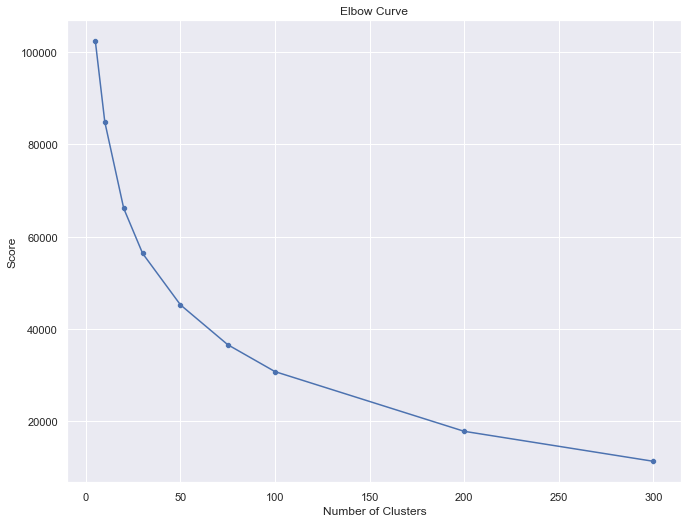

In [259]:
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

En este caso seleccionaria un valor de 50 cluster basado en el cambio de pendiente del grafico.